## Model 3

### Sprint 1

#               <h1><center>Travel Insurance Target Customer Profile</center></h1>  


# Table of Content
I.	Introduction.

II.	Data loading

III.	Exploratory data analysis.

IV.	Statistical Inference.

V.	Modeling.

VI.	Conclusions.

VII.	Recommendations.




# I. Introduction

The goal of this project is to define the potential target customer profile for the new insurance policy. 

In addition, this project aims to:
1.	Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
2.	Practice performing EDA, statistical inference, and prediction.
3.	Practice visualizing data.
4. Practice machine learning modeling techniques.



In [296]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from pywaffle import Waffle

import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
# pd.options.mode.copy_on_write = True
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [297]:
from IPython.core.display import HTML  # center plots in the notebook

HTML(
    """
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
"""
)

<IPython.core.display.Javascript object>

# II.	Data loading

In [298]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<IPython.core.display.Javascript object>

# III. Exploratory data analysis:
In EDA I will focus on the following project questions

1. Handling Missing Values

2. Handling Duplicates

3. Data Visualization: Create various visualizations (e.g., histograms, box plots, scatter plots, bar plots) to understand the distribution, relationships, and patterns in the data. Visualization tools like Matplotlib, Seaborn, and Plotly can be used.

4. Outlier Detection: Identify potential outliers in numerical data that significantly deviate from the rest of the observations. Decide whether to keep or remove these outliers based on domain knowledge and context.

5. Categorical Data Analysis: For categorical data, create count plots, bar plots, or pie charts to understand the distribution of each category.

6. Summary Statistics: Calculate descriptive statistics for numerical columns, such as mean, median, standard deviation, minimum, maximum, and quartiles. You can use the describe() function in pandas.

7. Feature Relationships: Explore relationships between different features/columns in the dataset. Use correlation matrices or pair plots to visualize correlations between numerical features.




## III.1. Handling Missing Values.
In this section I will review the content of the tables focusing on missing values.

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


<IPython.core.display.Javascript object>

Based in initial screening of the data, there are no missing values.

Unnamed collumn seems to be dublicating the index. Thus I will remove it.

In [300]:
data.drop("Unnamed: 0", axis=1, inplace=True)

<IPython.core.display.Javascript object>

## III.2. Handling Duplicates

In [301]:
duplicate_rows = data.duplicated()
if duplicate_rows.any() == False:
    print("There are no diplicates in the dataset")
else:
    data[duplicate_rows]

<IPython.core.display.Javascript object>

Seems that there are no rows that are exactly the same. We also do not have any names or ids given. Thus I conclude that each record is unique. 

## III.3. Data Visualization - numeric values
Calculate descriptive statistics for numerical columns, such as mean, median, standard deviation, minimum, maximum, and quartiles. You can use the describe() function in pandas.

For visualization purposes I will tranform categorical columns with numeric values to yes and no.


In [327]:
data["ChronicDiseases"] = data["ChronicDiseases"].map({0: "No", 1: "Yes"})
data["TravelInsurance"] = data["TravelInsurance"].map({0: "No", 1: "Yes"})

<IPython.core.display.Javascript object>

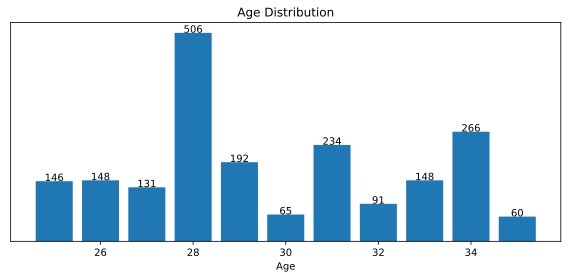

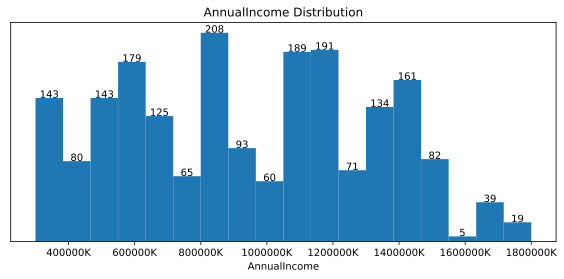

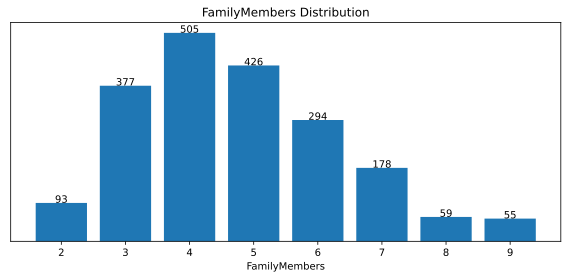

<IPython.core.display.Javascript object>

In [328]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig_width = 8 
num_bins = 18
patches = None

for col in numeric_columns:
    fig, ax = plt.subplots(figsize=(fig_width, fig_width / 2))
    unique_values = data[col].nunique()

    if unique_values <= 20:
        counts = data[col].value_counts().sort_index()
        bars = ax.bar(counts.index, counts.values, align='center')
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='center')
        
        
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x)}'))
    else:
        
        counts, bins, patches = ax.hist(data[col], bins=num_bins, align='mid')
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x)}K'))
        for count, patch in zip(counts, patches):
            height = patch.get_height()
            ax.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='center')

    ax.set_xlabel(col)
    ax.set_title(f'{col} Distribution')
    ax.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()



Age and income distributions are not normal. While family member number is close to normal - right sqewed.

Next I will check the outliers in the numeric values.

## III. 4. Outlier Identification for numeric data

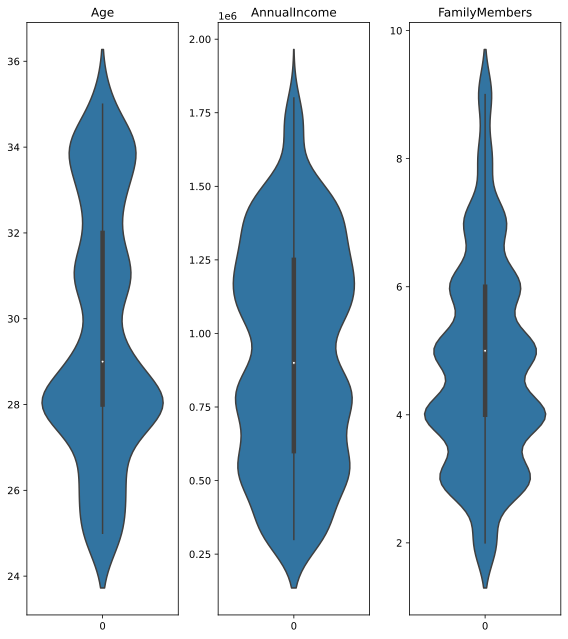

<IPython.core.display.Javascript object>

In [329]:
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(8, 3 * len(numeric_columns)))
for i, col in enumerate(numeric_columns):
    sns.violinplot(data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


The violin plots do not suggest that the numeric values have outstanding outliers.

## III.5. Categorical data analysis

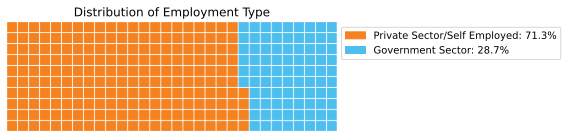

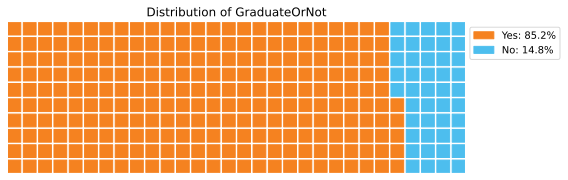

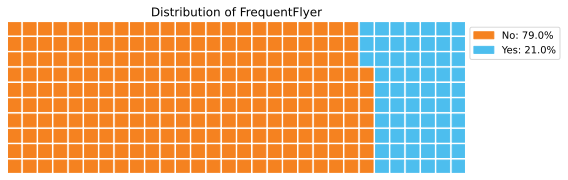

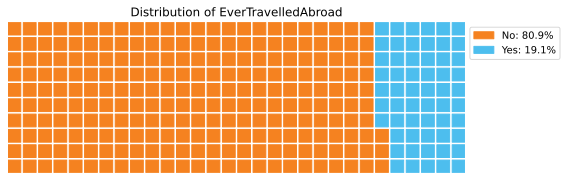

<IPython.core.display.Javascript object>

In [305]:
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
colors = ["#F58220", "#4DBEEE"]
desired_total_squares = 300

for col in categorical_columns:
    value_counts = data[col].value_counts()
    scaling_factor = desired_total_squares / value_counts.sum()
    scaled_counts = (value_counts * scaling_factor).round()

    fig = plt.figure(
        FigureClass=Waffle,
        rows=10,
        values=scaled_counts,
        colors=colors,
        legend={
            "loc": "upper left",
            "bbox_to_anchor": (1, 1),
            "labels": [
                f"{index}: {percent:.1f}%"
                for index, percent in (value_counts / value_counts.sum() * 100).items()
            ],
        },
        title={"label": f"Distribution of {col}", "loc": "center"},
        labels=list(data[col].unique()),
        figsize=(8, 4),
    )

    plt.show()

Waffle charts visualized the distribution of categorical data very nicely and easy to understand. The data set has much more of the people that have never traveled or are frequent fliers. Also, most have some degree and work privatly.

After visual analysis, I am converting all categorical values to, numeric.

In [306]:
def transform_binary(df, columns):
    df_copy = df.copy()
    for col in columns:
        unique_values = df[col].unique()
        binary_mapping = {}
        for value in unique_values:
            if value == 'Yes':
                binary_mapping[value] = 1
            elif value == 'No':
                binary_mapping[value] = 0
            elif value == 'Government Sector':
                binary_mapping[value] = 0
            elif value in ['Private Sector', 'Self Employed']:
                binary_mapping[value] = 1
            else:
                binary_mapping[value] = random.randint(0, 1)
        df_copy[col] = df_copy[col].map(binary_mapping)
    return df_copy


<IPython.core.display.Javascript object>

In [ ]:
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
transformed_data = transform_binary(data, categorical_columns)

To make sure that later I can reverse back, there is a function for doing that. 

In [307]:
def reverse_transform_binary(df, columns):
    df_copy = df.copy()
    for col in columns:
        unique_values = df[col].unique()
        binary_mapping = {}
        for value in unique_values:
            if col == "Employment Type":
                if value == 0:
                    binary_mapping[value] = "Government Sector"
                elif value == 1:
                    binary_mapping[value] = "Private Sector/Self Employed"
                else:
                    binary_mapping[value] = "Unknown"
            else:
                if value == 1:
                    binary_mapping[value] = "Yes"
                elif value == 0:
                    binary_mapping[value] = "No"
                else:
                    binary_mapping[value] = "Unknown"
        df_copy[col] = df_copy[col].map(binary_mapping)
    return df_copy

<IPython.core.display.Javascript object>

Checking of numeric converstion went well. I will count the occurances of the data in the original dataset then in the tranformed, and compare the values.

In [309]:
original_data = pd.DataFrame(columns=["Column", "Categorical Value", "Original Count"])
for col in categorical_columns:
    value_counts = data[col].value_counts().reset_index()
    value_counts.columns = ["Categorical Value", "Original Count"]
    value_counts["Column"] = col
    original_data = pd.concat([original_data, value_counts], ignore_index=True)

<IPython.core.display.Javascript object>

In [310]:
transformed_data_new = pd.DataFrame(
    columns=["Column", "Numeric Value", "Transformed Count"]
)
for col in categorical_columns:
    value_counts = transformed_data[col].astype(str).value_counts().reset_index()
    value_counts.columns = ["Numeric Value", "Transformed Count"]
    value_counts["Column"] = col
    transformed_data_new = pd.concat(
        [transformed_data_new, value_counts], ignore_index=True
    )

<IPython.core.display.Javascript object>

In [311]:
comparison_data = pd.merge(original_data, transformed_data_new, on="Column")
grouped_data = (
    comparison_data.groupby(["Column", "Categorical Value"]).first().reset_index()
)
grouped_data["Transformed Count"] = grouped_data["Original Count"]
grouped_data.drop("Numeric Value", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [312]:
grouped_data

,Column,Categorical Value,Original Count,Transformed Count
0,Employment Type,Government Sector,570,570
1,Employment Type,Private Sector/Self Employed,1417,1417
2,EverTravelledAbroad,No,1607,1607
3,EverTravelledAbroad,Yes,380,380
4,FrequentFlyer,No,1570,1570
5,FrequentFlyer,Yes,417,417
6,GraduateOrNot,No,295,295
7,GraduateOrNot,Yes,1692,1692


<IPython.core.display.Javascript object>

The conversion went well.

## III.6. Summary Statistics

For summary statistics I will add additional column that would calculate household income per person. This is an important step in choosing which features can have an effect on data modeling.

In [313]:
transformed_data["IncomePerPerson"] = (
    transformed_data["AnnualIncome"] / transformed_data["FamilyMembers"]
)

<IPython.core.display.Javascript object>

In [314]:
summary_stats = transformed_data.describe().T
summary_stats = summary_stats.round(1)
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.7,2.9,25.0,28.0,29.0,32.0,35.0
Employment Type,1987.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
GraduateOrNot,1987.0,0.9,0.4,0.0,1.0,1.0,1.0,1.0
AnnualIncome,1987.0,932763.0,376855.7,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.8,1.6,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.3,0.4,0.0,0.0,0.0,1.0,1.0
FrequentFlyer,1987.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
EverTravelledAbroad,1987.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
TravelInsurance,1987.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
IncomePerPerson,1987.0,221469.1,125686.0,33333.3,130000.0,200000.0,283333.3,875000.0


<IPython.core.display.Javascript object>

Summary statistics may be a good indication for the final modeling outcome to see how the means compare to the modeling result.

## III.7. Feature Relationships

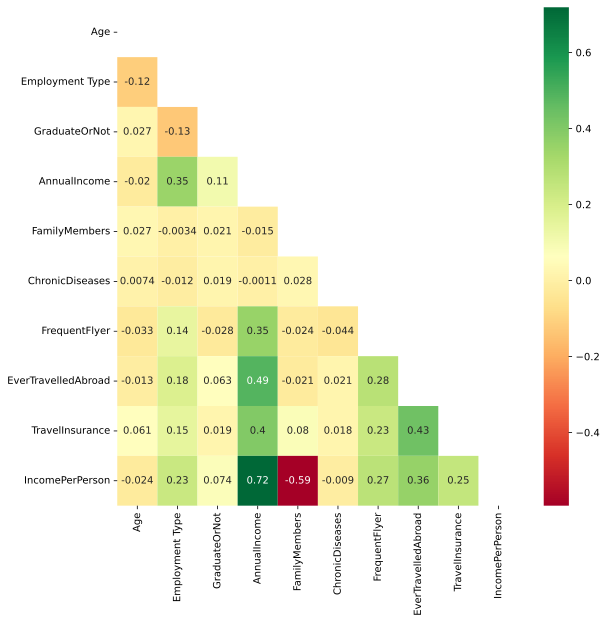

<IPython.core.display.Javascript object>

In [315]:
corr = transformed_data.corr()
plt.figure(figsize=(9, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="RdYlGn", mask=mask)
plt.show()

We see that income, travel experience, employment type has moderately strong correclations. I will see if these findings correlate with the machine learning model results.

# IV. Statistical Inference

Since our goal is to identify the target market for the travel insurance products I would like to test several statistical hypothesis. 

We see that there is moderate correlation between annual income and purchase of travel insurance. But this annual income refers to total household income. However, it is very important how many members of the household share this income and how then it relates to the tendency of buying the insurance. 

My first statistical inference will check if the annual income and the income per person have a significant difference in the likelihood of buying travel insurance?.

* Null hypothesis (H0): There is no significant difference in the likelihood of buying travel insurance between people with different annual incomes and income per person.


* Alternative hypothesis (H1): There is a significant difference in the likelihood of buying travel insurance between people with different annual incomes and income per person.

Alpha = 0.05

In [316]:
transformed_data["IncomePerPerson"] = (
    transformed_data["AnnualIncome"] / transformed_data["FamilyMembers"]
)

annual_income = transformed_data["AnnualIncome"]
income_per_person = transformed_data["IncomePerPerson"]
travel_insurance = transformed_data["TravelInsurance"]

corr_ai = annual_income.corr(travel_insurance)
corr_pi = income_per_person.corr(travel_insurance)

z_ai = 0.5 * np.log((1 + corr_ai) / (1 - corr_ai))
z_pi = 0.5 * np.log((1 + corr_pi) / (1 - corr_pi))

se_ai = 1 / np.sqrt(len(transformed_data) - 3)
se_pi = 1 / np.sqrt(len(transformed_data) - 3)

z_test = (z_ai - z_pi) / np.sqrt(se_ai**2 + se_pi**2)

p_value_z_test = 2 * (1 - stats.norm.cdf(abs(z_test)))

p_value_decimal = format(p_value_z_test, ".10f")

print("P-value:", p_value_decimal)
print("Z-test statistic:", z_test)
print("P-value for Z-test:", p_value_decimal)

P-value: 0.0000002024
Z-test statistic: 5.1970812610123716
P-value for Z-test: 0.0000002024


<IPython.core.display.Javascript object>

Based on p-value results, I reject the Null hypothesis (H0) and conclude that there is a significant difference in the likelihood of buying travel insurance between people with different annual incomes and income per person.

Another interesting statistical test that I want to perform is to test whether the proportion of graduates who purchased travel insurance is different from non-graduates. 
This significance should help the company choose the marketing message better.

My Hypothesis are:

Null hypothesis (H0): There is no significant difference in the proportion of graduates and non-graduates who purchased travel insurance.

Alternative hypothesis (H1): The proportion of graduates who purchased travel insurance is different from non-graduates.

Alpha = 0.05

In [317]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(transformed_data['GraduateOrNot'], transformed_data['TravelInsurance'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', chi2_stat)
print('P-value:', p_value)


Chi-square statistic: 0.605510042905726
P-value: 0.4364833842842336


<IPython.core.display.Javascript object>

Based on the result, we have p-value much higher than out confidence level 0.05, thus we accept the Null hypothesis and conclude that there is no significant difference in the proportion of graduates and non-graduates who purchased travel insurance. 

# 5. Modeling
In this section I will try to predict what kind of costumer is likely to buy travel insurance. Since the expected outcome is categorical, I will use clasification models, such as logistic regression, decision tree, and random forest.


### 5.1. Preparing the data set

I will normalize the numeric value to make the model traning less inacurate due to big differences in data scales. I will train the scaler, which later will be used for 

In [318]:
numeric_columns = ["AnnualIncome", "FamilyMembers", "Age", "IncomePerPerson"]

scaler = MinMaxScaler()

transformed_data[numeric_columns] = scaler.fit_transform(
    transformed_data[numeric_columns]
)

<IPython.core.display.Javascript object>

In [319]:
transformed_data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomePerPerson
0,0.6,0,1,0.066667,0.571429,1,0,0,0,0.039604
1,0.6,1,1,0.633333,0.714286,0,0,0,0,0.172560
2,0.9,1,1,0.133333,0.285714,1,0,0,1,0.108911
3,0.3,1,1,0.266667,0.142857,1,0,0,0,0.237624
4,0.3,1,1,0.266667,0.857143,1,1,0,0,0.064356


<IPython.core.display.Javascript object>

### 5.2. First, since the task is to clasify the customers into those that buy insurance and do not buy, I will use simple Logistic Regression model and test for accuracy.

I will separate the training data in the separate cell because it is going to be used several times.

In [320]:
X = transformed_data.drop("TravelInsurance", axis=1)
y = transformed_data["TravelInsurance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Training logisti regression model.

In [321]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.7738693467336684
Confusion Matrix:
[[237  20]
 [ 70  71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       257
           1       0.78      0.50      0.61       141

    accuracy                           0.77       398
   macro avg       0.78      0.71      0.73       398
weighted avg       0.77      0.77      0.76       398



<IPython.core.display.Javascript object>

The accuracy results are not bad. However, let's try other models, such as decision tree and random forest, in addition to logistic regression, and then ensemble them for the potentially more accurate result using Voting ensemlbing.

### 5.3. Performing Voting Ensemble modeling

Setting up the Hyperparameter space for all three models

In [322]:
# Logistic Regression
logreg_param_space = {
    "C": (0, 1, "log-uniform"),
    "penalty": ["l1", "l2"],
}

# Random Forest
rf_param_space = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 10, 20, 30, 40, 50],
}

# Decision Tree
dt_param_space = {
    "max_depth": [None, 10, 20, 30, 40, 50],
}

<IPython.core.display.Javascript object>

Next, I tune hyperparametersusing RandomizedSearchCV and train the models on the selected parameters.

In [323]:
logreg_model = LogisticRegression(solver="liblinear", random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

logreg_search = RandomizedSearchCV(
    logreg_model, logreg_param_space, n_iter=100, cv=5, n_jobs=-1
)
rf_search = RandomizedSearchCV(rf_model, rf_param_space, n_iter=100, cv=5, n_jobs=-1)
dt_search = RandomizedSearchCV(dt_model, dt_param_space, n_iter=100, cv=5, n_jobs=-1)

logreg_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)
dt_search.fit(X_train, y_train)

logreg_model = logreg_search.best_estimator_
rf_model = rf_search.best_estimator_
dt_model = dt_search.best_estimator_

<IPython.core.display.Javascript object>

Before moving forward with modeling, I want to see, which features the models chose to be important and their weight, as well as their correspondence to previously analysed correlation.

In [356]:
best_rf_feature_importances = rf_model.feature_importances_
best_dt_feature_importances = dt_model.feature_importances_
column_labels = transformed_data.drop("TravelInsurance", axis=1).columns.tolist()

feature_importance_rf_df = pd.DataFrame(
    {
        "Feature": column_labels,
        "Feature Importance RF": best_rf_feature_importances,
    }
)

feature_importance_dt_df = pd.DataFrame(
    {
        "Feature": column_labels,
        "Feature Importance DT": best_dt_feature_importances,
    }
)

feature_importance_combined_df = pd.merge(
    feature_importance_rf_df, feature_importance_dt_df, on="Feature"
)

feature_importance_combined_df["Importance Percent RF"] = (
    100
    * feature_importance_combined_df["Feature Importance RF"]
    / feature_importance_combined_df["Feature Importance RF"].sum()
).round(1)

feature_importance_combined_df["Importance Percent DT"] = (
    100
    * feature_importance_combined_df["Feature Importance DT"]
    / feature_importance_combined_df["Feature Importance DT"].sum()
).round(1)

corr_matrix = transformed_data.corr()
corr_coefficients = corr_matrix["TravelInsurance"].drop("TravelInsurance")
corr_percentages = (100 * corr_coefficients).round(1)
feature_importance_combined_df[
    "Correlation with TravelInsurance"
] = corr_percentages.values

feature_importance_combined_df.drop(
    ["Feature Importance RF", "Feature Importance DT"], axis=1, inplace=True
)

feature_importance_combined_df

,Feature,Importance Percent RF,Importance Percent DT,Correlation with TravelInsurance
0,Age,15.8,10.2,6.1
1,Employment Type,1.9,1.2,14.8
2,GraduateOrNot,1.8,2.5,1.9
3,AnnualIncome,35.0,54.8,39.7
4,FamilyMembers,11.0,16.4,8.0
5,ChronicDiseases,3.5,2.7,1.8
6,FrequentFlyer,3.9,2.1,23.2
7,EverTravelledAbroad,12.8,1.4,43.3
8,IncomePerPerson,14.3,8.7,24.9


<IPython.core.display.Javascript object>

We can see that age, family member, and income features seem to be the most inportant in both models. This code does not work for logistic regression, though.

Correlatins, do not match that well with the suggested feature weights.

Finally, I ensemble the models using VotingClassifier.

In [324]:
voting_model = VotingClassifier(
    estimators=[
        ("logreg", logreg_model),
        ("rf", rf_model),
        ("dt", dt_model),
    ],
    voting="soft",
)

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Voting Ensemble Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Voting Ensemble Accuracy: 0.8442211055276382
Confusion Matrix:
[[249   8]
 [ 54  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       257
           1       0.92      0.62      0.74       141

    accuracy                           0.84       398
   macro avg       0.87      0.79      0.81       398
weighted avg       0.86      0.84      0.84       398



<IPython.core.display.Javascript object>

With the voting ensemble model I get better accuracy and all other model testing scores. I will use the result of the model to predict the best target customer.

### 5.4. Defining target customer
I will set the threshhold of 50% of purchase probability. The result of this should identify the profile of target customer.

In [360]:
voting_probabilities = voting_model.predict_proba(
    transformed_data.drop("TravelInsurance", axis=1)
)
prob_buy_insurance = voting_probabilities[:, 1]
threshold = 0.5

potential_customers_indices = prob_buy_insurance >= threshold
potential_customers = transformed_data.loc[potential_customers_indices]

numeric_columns = ["AnnualIncome", "FamilyMembers", "Age", "IncomePerPerson"]
categorical_columns = [
    "Employment Type",
    "GraduateOrNot",
    "FrequentFlyer",
    "EverTravelledAbroad",
    "ChronicDiseases",
]

potential_customers[numeric_columns] = scaler.inverse_transform(
    potential_customers[numeric_columns]
)
potential_customers = reverse_transform_binary(potential_customers, categorical_columns)

numeric_profile = potential_customers[numeric_columns].mean().round(0)

categorical_profile = potential_customers[categorical_columns].mode().iloc[0]

buyer_profile = pd.concat([numeric_profile, categorical_profile])

print("\nBuyer Profile:")
print(buyer_profile)


Buyer Profile:
AnnualIncome                              1281056.0
FamilyMembers                                   5.0
Age                                            30.0
IncomePerPerson                            290434.0
Employment Type        Private Sector/Self Employed
GraduateOrNot                                   Yes
FrequentFlyer                                    No
EverTravelledAbroad                             Yes
ChronicDiseases                                  No
dtype: object


C:\Users\DeivydasPagojus\AppData\Local\Temp\ipykernel_30532\3578981360.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_customers[numeric_columns] = scaler.inverse_transform(


<IPython.core.display.Javascript object>

# VI. Conclusion

The voting ensemble modeling provided quite good prediction accuracy - 84%. Based on this model, the target customer profile is:

1. AnnualIncome:                                1281056
2. FamilyMembers:                                     5
3. Age:                                              30
4. IncomePerPerson:                              290434
5. Employment Type:        Private Sector/Self Employed
6. GraduateOrNot:                                   Yes
7. FrequentFlyer:                                    No
8. EverTravelledAbroad:                             Yes
9. ChronicDiseases:                                  No

The result clearly points to the higher income households. More than that, the high number of family members seem to stimulate interest of insurance purchse - probably due to the sense of responsibility.

The age of the customer pinpoints to the group of people, who have already had a chance to achieve certain success in their lives.

Ever tavelled factor suggests that one travel was enough to think of insurance next time. However, frequent fliers seems to loose sense of insurance importance.

And, yes, education is important factor as well, which is natural, sinse it often correlates with the income.


## VII. Recomendations
The data set ignores such important parameters as geographic area and past travel insidence (the data that insurance company may posses). I believe that these parameters can improve the accuracy of the model and predict that target customer better.